## This notebook contains data exploration for search_request.csv and search_result_interaction.csv

# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [2]:
!pip install --upgrade gensim
!pip install transformers

import pandas as pd
from gensim.models import Word2Vec
import gensim.downloader as api

import nltk
nltk.download('punkt')
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patheffects as PathEffects
import matplotlib.patheffects as PathEffects
from mpl_toolkits.mplot3d import Axes3D

from sklearn.manifold import TSNE

import tempfile
import imageio
import shutil
import os

     |████████████████████████████████| 24.2MB 135kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 1.8MB 8.0MB/s 
     |████████████████████████████████| 2.9MB 34.7MB/s 
     |████████████████████████████████| 890kB 51.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=9ea1608cb738662c9292cab6152b51bc41c625427422c98388293ff4154c8ea8
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Data Exploration - ```search_request.csv``` 
A table with data about the initiating search request. It contains the query and other search metadata, including a unique search ID and user ID

In [3]:
# Function to load the data into a pandas dataframe 
search_request_path = "/content/drive/MyDrive/Vimeo Datasets/search_request.csv"
def load_search_request(csv_name):
    column_names = ['search_id', 'search_query', 'ts', 'cuid', 'total']
    return pd.read_csv(csv_name, names=column_names)

In [4]:
# Load data into pandas dataframe and show top 10 values
search_request_df = load_search_request(search_request_path)
search_request_df = search_request_df.drop(search_request_df.index[0])
search_request_df.head(10)

,search_id,search_query,ts,cuid,total
0.0,gSogzavY5nP7fCLEtWdc,wyrm,2020-03-10 09:24:31.000 -0400,1259928,86
1.0,LJVevlnG6YSz8hWRzGAu,can you read my lips,2020-09-02 17:41:24.000 -0400,95330844,142
2.0,HcDHbnD7ltPkAiz5WzV3,brotherhood,2020-02-06 05:06:29.000 -0500,387121055,9101
3.0,gMcLq136RLayGwcTAaWC,space,2019-05-30 18:34:31+02:00,126560490,516935
4.0,OZ5zcPalXTnl9F2aILNJ,titles,2019-01-14 13:52:12-05:00,67184974,161300
5.0,ES4KAvHkRjTxdvLEZsHi,lips,2019-12-07 23:26:20.000 -0500,78134782,34012
6.0,6PlHuca34hz4Tcnd8DzQ,brotherhood of skiing,2020-02-19 19:54:51.000 -0500,8536266,34
7.0,m5qHM7T5fnkJOSWCYxS7,gallery,2018-09-25 16:23:02.000 -0400,54598922,162631
8.0,RCq8Lc9warr2n8Y0gqhh,snö,2018-09-12 19:46:10.000 -0400,117670766,2989
9.0,fXeCxI8CGeiuItNA2mKO,vimeo on demand,2020-05-19 23:21:05.000 -0400,243295225,5761


In [5]:
# Check if there are duplicate search ids --> This is what we want to drop to remove duplicates
duplicate_search_id = search_request_df['search_id'].duplicated().any()
print("Duplicate search ids: ", duplicate_search_id)

Duplicate search ids:  True


In [6]:
# Check how many duplicates there where and drop those entries
#   Duplicates were interpreted as entries with the same search_id
print("Before deleting duplicates: ", len(search_request_df))
search_request_df = search_request_df.drop_duplicates(subset=['search_id'])
print("After deleting duplicates: ", len(search_request_df))

Before deleting duplicates:  2594
After deleting duplicates:  2494


In [7]:
# Convert time stamp to standardized format
search_request_df['ts'] = pd.to_datetime(search_request_df['ts'])

In [8]:
search_request_df.head(10)

,search_id,search_query,ts,cuid,total
0.0,gSogzavY5nP7fCLEtWdc,wyrm,2020-03-10 09:24:31-04:00,1259928,86
1.0,LJVevlnG6YSz8hWRzGAu,can you read my lips,2020-09-02 17:41:24-04:00,95330844,142
2.0,HcDHbnD7ltPkAiz5WzV3,brotherhood,2020-02-06 05:06:29-05:00,387121055,9101
3.0,gMcLq136RLayGwcTAaWC,space,2019-05-30 18:34:31+02:00,126560490,516935
4.0,OZ5zcPalXTnl9F2aILNJ,titles,2019-01-14 13:52:12-05:00,67184974,161300
5.0,ES4KAvHkRjTxdvLEZsHi,lips,2019-12-07 23:26:20-05:00,78134782,34012
6.0,6PlHuca34hz4Tcnd8DzQ,brotherhood of skiing,2020-02-19 19:54:51-05:00,8536266,34
7.0,m5qHM7T5fnkJOSWCYxS7,gallery,2018-09-25 16:23:02-04:00,54598922,162631
8.0,RCq8Lc9warr2n8Y0gqhh,snö,2018-09-12 19:46:10-04:00,117670766,2989
9.0,fXeCxI8CGeiuItNA2mKO,vimeo on demand,2020-05-19 23:21:05-04:00,243295225,5761


## Visualizing Search Queries in Latent Space

In [9]:
'''
Use the nltk library and word2vec to visualize 
word embedding vectors for the search queries
Code referenced from: https://towardsdatascience.com/visualization-of-word-embedding-vectors-using-gensim-and-pca-8f592a5d3354 
'''

# Extract search queries into a list from the pandas data frame
query_list = search_request_df["search_query"].tolist()

# Tokenize each of the queries to prepare for word2vec model
tokens=[nltk.word_tokenize(words) for words in query_list]

# Run the tokenized data through word2vec model to get word embeddings
model = Word2Vec(tokens,size=50,sg=1,min_count=1)

# Get matrix of word embeddings and the words to prepare for visualization 
X=model[model.wv.vocab]
df=pd.DataFrame(X)
df.shape
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,-0.009977,-0.008803,-0.006527,0.003693,0.006331,-0.005166,0.002997,-0.006185,-0.005486,0.008399,0.006261,0.004429,-0.008508,-0.006910,-0.003941,-0.000772,-0.000341,-0.000202,0.006083,-0.001380,0.000218,-0.000339,0.005843,0.001371,-0.001665,0.008938,0.001043,-0.007393,0.008676,-0.001130,0.007600,0.002882,-0.000114,0.009797,-0.001825,-0.006641,-0.008174,-0.005767,0.008870,0.007710,0.002329,-0.000486,0.002004,0.004654,0.000695,-0.004957,0.005880,-0.003714,-0.004087,-0.008761
1,0.001674,0.009389,0.009942,-0.009011,0.009323,-0.004896,0.003172,0.007627,-0.005006,-0.001537,0.002551,-0.003761,0.002776,0.001607,0.005305,-0.005612,0.003275,-0.008702,0.009520,-0.001477,-0.004186,0.006863,-0.009234,-0.007275,-0.006711,0.000739,0.001218,0.007022,0.003825,-0.004050,-0.002894,0.007980,-0.004321,0.004946,0.008730,0.000036,-0.007029,0.001309,-0.000860,0.002395,-0.005651,-0.008808,0.006470,0.001694,-0.009003,0.003139,-0.006542,0.005304,-0.005228,0.008487
2,-0.002304,0.007699,0.008837,0.002466,0.003027,0.009033,0.003925,-0.008853,-0.007424,0.003564,0.005520,-0.003774,0.007180,0.003537,0.006531,0.002726,-0.003519,-0.000525,-0.002188,0.009566,0.003354,-0.009876,0.005535,0.007101,-0.004263,0.008320,0.002856,0.004538,0.001400,0.001288,-0.003156,0.001319,-0.003051,0.010645,0.008533,0.009424,-0.007875,0.002359,-0.002484,-0.006428,0.000504,-0.000432,0.002829,0.007633,0.007619,0.001158,0.009954,-0.008961,-0.007419,0.004904
3,-0.005831,0.005964,0.003578,-0.008360,-0.009531,-0.004365,0.003950,-0.002259,0.009526,-0.005381,-0.001389,0.008647,0.006941,-0.009296,0.009582,0.003575,0.004696,0.005989,-0.005169,-0.008685,-0.004848,0.001300,0.007857,0.003380,-0.004894,0.000683,0.000185,-0.009021,-0.005476,0.000084,-0.005364,0.006664,0.003939,-0.009790,0.009801,0.001648,0.003939,-0.005469,-0.001338,-0.006541,0.001149,-0.001100,0.009020,0.005639,0.009002,-0.007193,-0.005330,-0.001212,0.007059,-0.008827
4,-0.001607,-0.008545,0.001359,0.007886,0.008974,-0.008880,-0.000390,0.005019,-0.009342,-0.004553,0.009056,0.003635,-0.002526,0.003675,-0.001177,-0.008120,-0.004220,-0.004473,0.004943,0.008449,0.000631,0.001426,-0.000476,-0.001702,0.007311,-0.003478,0.000147,-0.001894,-0.002243,-0.000547,0.005926,0.005474,-0.002522,0.007839,-0.001640,-0.006179,-0.004860,-0.004045,-0.008129,0.009088,-0.008054,-0.009457,0.007725,0.008677,-0.008777,0.001148,-0.004773,-0.001790,0.008558,0.002156


In [19]:
'''
Use principal component analysis to visualize embeddings
'''
# Computing the correlation matrix of the word embeddings
X_corr = df.corr()

# Computing eigen values and eigen vectors
values,vectors = np.linalg.eig(X_corr)

# Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

# Taking first 2 components which explain maximum variance for projecting
new_vectors = vectors[:,:2]

# Projecting it onto new dimesion with 2 axis
new_X = np.dot(X,new_vectors)

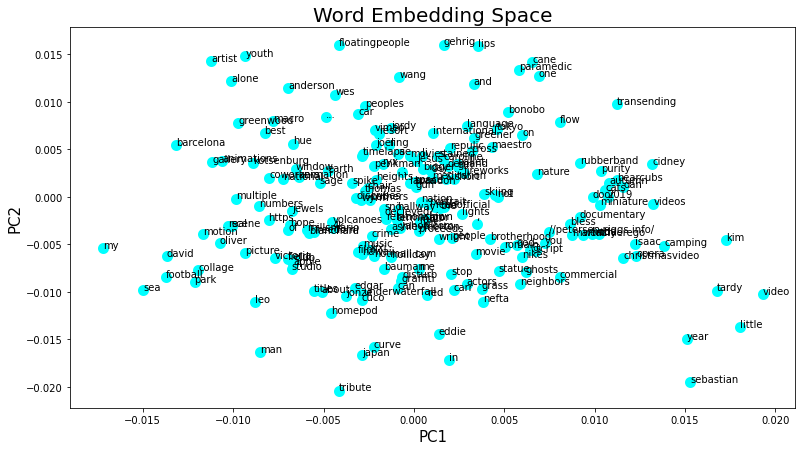

In [23]:
'''
Plot embeddings using matplotlib
'''
plt.figure(figsize=(13,7))
plt.scatter(new_X[:200, 0],new_X[:200,1],linewidths=5,color='cyan')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(model.wv.vocab)
for i, word in enumerate(vocab[:200]):
  plt.annotate(word,xy=(new_X[i,0],new_X[i,1]))
plt.savefig('word_embedding', dpi=150, bbox_inches='tight')

### The figure above provides a visualization of the word embeddings in a dense spcae. It gives us an idea of how the word embeddings relate to each other with respect to a cosin similarity metric in a latent space. For example, this embedding space shows us that the words 'artist', 'youth', and 'alone' are 'simiilar'

In [ ]:
'''
We can also use several pretrained language models in the gensim library
to compute similar words to words in the search_request database. This process
also uses word embeddings to compute similarities. The model used below is the
GloVe model to compute the top five most similar words to 'techniques' which was
an entry in the search_request database. 

Code referenced from: https://amitness.com/2020/05/data-augmentation-for-nlp/  
'''
model = api.load('glove-twitter-25')  
model.most_similar('techniques', topn=5)

[==================================================] 100.0% 104.8/104.8MB downloaded


[('methods', 0.9181531667709351),
 ('strategies', 0.9032960534095764),
 ('branding', 0.8861738443374634),
 ('alternative', 0.8816344141960144),
 ('habits', 0.8797299861907959)]

In [26]:
'''
We can also leverage masked language transformer models such as BERT 
that have been pretrained on a large corpus of text to augment text. 
For example, given a query, we can generate alternate query searches
or reformulate the query by using one of these models. The disadvantage 
to this method is that it's difficult to figure out which part of the 
sentence should be augmented. However, it can be useful to generate and 
explore alternate or similar query searches. 
'''

from transformers import pipeline
nlp = pipeline('fill-mask')
# Example from search_request database, original query was: 'vimeo on demand'
nlp('<mask> on demand')

Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['lm_head.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[{'score': 0.015508593991398811,
  'sequence': '<s>Based on demand</s>',
  'token': 20930,
  'token_str': 'Based'},
 {'score': 0.014293973334133625,
  'sequence': '<s>Food on demand</s>',
  'token': 29337,
  'token_str': 'Food'},
 {'score': 0.012535111978650093,
  'sequence': '<s>Data on demand</s>',
  'token': 30383,
  'token_str': 'Data'},
 {'score': 0.012085427530109882,
  'sequence': '<s>Netflix on demand</s>',
  'token': 29675,
  'token_str': 'Netflix'},
 {'score': 0.011770960874855518,
  'sequence': '<s>Made on demand</s>',
  'token': 29709,
  'token_str': 'Made'}]

In [66]:
'''
The following code is used for visualizing high-dimensional 
Word2Vec word embeddings using t-SNE. t-SNE plots are helpful
in visualizing complex relationships between word vectors and 
provide a better visualization of word embedding vectors

The code below generates 30 similar words to the following keys
using the word2vec model and visualizes the word embeddings with
a t-SNE plot. 

Code referenced from: https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d
'''

# These keys were taken from queries in search_request
keys = ['brotherhood', 'space', 'mouth', 'nation', 'president']

# Generate top 30 most similar words to each key according to word2vec model
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=60, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

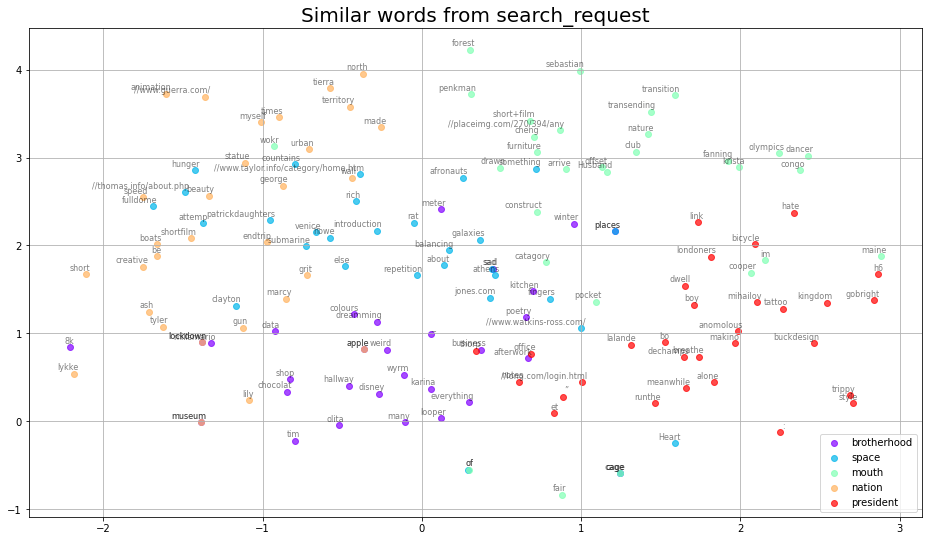

In [67]:
% matplotlib inline
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title, size=20)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_similar_words('Similar words from search_request', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

### The figure above shows that the queries most similar to each of the key queries are closer to each other which will be helpful in clustering and categorizing similar queries and how they relate to each other in relation to what is clicked on. 

## Using a textual encoder (transformer) from OpenAI Clip Model to get textual features for the queries

The OpenAI Clip model can be leveraged to process textual data and extract text features, and process video data to produce video features, and minimize the distance between the textual and video features. The textual and video data can be linked based on what a user clicked on. 

https://openai.com/blog/clip/ 

https://cdn.openai.com/papers/Learning_Transferable_Visual_Models_From_Natural_Language_Supervision.pdf

In [10]:
import subprocess

CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)

if CUDA_version == "10.0":
    torch_version_suffix = "+cu100"
elif CUDA_version == "10.1":
    torch_version_suffix = "+cu101"
elif CUDA_version == "10.2":
    torch_version_suffix = ""
else:
    torch_version_suffix = "+cu110"

CUDA version: 10.1


In [11]:
! pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4MB 16kB/s 
     |████████████████████████████████| 12.8MB 247kB/s 
     |████████████████████████████████| 71kB 4.5MB/s 
  Created wheel for ftfy: filename=ftfy-5.8-cp36-none-any.whl size=45613 sha256=477316b776c23a4e7fc1856eef61275e0b160e95cde80a9ac670c8b46db4c9a9
  Stored in directory: /root/.cache/pip/wheels/ba/c0/ef/f28c4da5ac84a4e06ac256ca9182fc34fa57fefffdbc68425b
Successfully built ftfy
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [12]:
import numpy as np
import torch

print("Torch version:", torch.__version__)

Torch version: 1.7.1+cu101


In [13]:
! pip install ftfy regex
! wget https://openaipublic.azureedge.net/clip/bpe_simple_vocab_16e6.txt.gz -O bpe_simple_vocab_16e6.txt.gz

--2021-01-27 17:57:54--  https://openaipublic.azureedge.net/clip/bpe_simple_vocab_16e6.txt.gz
Resolving openaipublic.azureedge.net (openaipublic.azureedge.net)... 13.107.246.13, 2620:1ec:bdf::13
Connecting to openaipublic.azureedge.net (openaipublic.azureedge.net)|13.107.246.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1356917 (1.3M) [application/octet-stream]
Saving to: ‘bpe_simple_vocab_16e6.txt.gz’

bpe_simple_vocab_16 100%[===================>]   1.29M  --.-KB/s    in 0.1s    

2021-01-27 17:57:54 (9.71 MB/s) - ‘bpe_simple_vocab_16e6.txt.gz’ saved [1356917/1356917]



In [14]:
#@title

import gzip
import html
import os
from functools import lru_cache

import ftfy
import regex as re


@lru_cache()
def bytes_to_unicode():
    """
    Returns list of utf-8 byte and a corresponding list of unicode strings.
    The reversible bpe codes work on unicode strings.
    This means you need a large # of unicode characters in your vocab if you want to avoid UNKs.
    When you're at something like a 10B token dataset you end up needing around 5K for decent coverage.
    This is a signficant percentage of your normal, say, 32K bpe vocab.
    To avoid that, we want lookup tables between utf-8 bytes and unicode strings.
    And avoids mapping to whitespace/control characters the bpe code barfs on.
    """
    bs = list(range(ord("!"), ord("~")+1))+list(range(ord("¡"), ord("¬")+1))+list(range(ord("®"), ord("ÿ")+1))
    cs = bs[:]
    n = 0
    for b in range(2**8):
        if b not in bs:
            bs.append(b)
            cs.append(2**8+n)
            n += 1
    cs = [chr(n) for n in cs]
    return dict(zip(bs, cs))


def get_pairs(word):
    """Return set of symbol pairs in a word.
    Word is represented as tuple of symbols (symbols being variable-length strings).
    """
    pairs = set()
    prev_char = word[0]
    for char in word[1:]:
        pairs.add((prev_char, char))
        prev_char = char
    return pairs


def basic_clean(text):
    text = ftfy.fix_text(text)
    text = html.unescape(html.unescape(text))
    return text.strip()


def whitespace_clean(text):
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text


class SimpleTokenizer(object):
    def __init__(self, bpe_path: str = "bpe_simple_vocab_16e6.txt.gz"):
        self.byte_encoder = bytes_to_unicode()
        self.byte_decoder = {v: k for k, v in self.byte_encoder.items()}
        merges = gzip.open(bpe_path).read().decode("utf-8").split('\n')
        merges = merges[1:49152-256-2+1]
        merges = [tuple(merge.split()) for merge in merges]
        vocab = list(bytes_to_unicode().values())
        vocab = vocab + [v+'</w>' for v in vocab]
        for merge in merges:
            vocab.append(''.join(merge))
        vocab.extend(['<|startoftext|>', '<|endoftext|>'])
        self.encoder = dict(zip(vocab, range(len(vocab))))
        self.decoder = {v: k for k, v in self.encoder.items()}
        self.bpe_ranks = dict(zip(merges, range(len(merges))))
        self.cache = {'<|startoftext|>': '<|startoftext|>', '<|endoftext|>': '<|endoftext|>'}
        self.pat = re.compile(r"""<\|startoftext\|>|<\|endoftext\|>|'s|'t|'re|'ve|'m|'ll|'d|[\p{L}]+|[\p{N}]|[^\s\p{L}\p{N}]+""", re.IGNORECASE)

    def bpe(self, token):
        if token in self.cache:
            return self.cache[token]
        word = tuple(token[:-1]) + ( token[-1] + '</w>',)
        pairs = get_pairs(word)

        if not pairs:
            return token+'</w>'

        while True:
            bigram = min(pairs, key = lambda pair: self.bpe_ranks.get(pair, float('inf')))
            if bigram not in self.bpe_ranks:
                break
            first, second = bigram
            new_word = []
            i = 0
            while i < len(word):
                try:
                    j = word.index(first, i)
                    new_word.extend(word[i:j])
                    i = j
                except:
                    new_word.extend(word[i:])
                    break

                if word[i] == first and i < len(word)-1 and word[i+1] == second:
                    new_word.append(first+second)
                    i += 2
                else:
                    new_word.append(word[i])
                    i += 1
            new_word = tuple(new_word)
            word = new_word
            if len(word) == 1:
                break
            else:
                pairs = get_pairs(word)
        word = ' '.join(word)
        self.cache[token] = word
        return word

    def encode(self, text):
        bpe_tokens = []
        text = whitespace_clean(basic_clean(text)).lower()
        for token in re.findall(self.pat, text):
            token = ''.join(self.byte_encoder[b] for b in token.encode('utf-8'))
            bpe_tokens.extend(self.encoder[bpe_token] for bpe_token in self.bpe(token).split(' '))
        return bpe_tokens

    def decode(self, tokens):
        text = ''.join([self.decoder[token] for token in tokens])
        text = bytearray([self.byte_decoder[c] for c in text]).decode('utf-8', errors="replace").replace('</w>', ' ')
        return text

In [15]:
tokenizer = SimpleTokenizer()
text_tokens = [tokenizer.encode(desc) for desc in query_list]

In [17]:
print(len(text_tokens))

2494


In [18]:
print(text_tokens[0])

[4665, 8431]


# Data Exploration - `search_result_interaction`

In [75]:
# Function to load the data into a pandas dataframe 
search_result_path = "/content/drive/MyDrive/Vimeo Datasets/search_result_interaction.csv"
def load_search_result(csv_name):
    column_names = ['search_id', 'ts', 'cid', 'position']
    return pd.read_csv(csv_name, names=column_names)

In [81]:
# Load data into pandas dataframe and show top 10 values
search_result_df = load_search_result(search_result_path)
search_result_df = search_result_df.drop(search_result_df.index[0])
search_result_df.head(10)

,search_id,ts,cid,position
0.0,CjooiSDXx5dsx4ipdOoS,2018-09-03 21:24:50.000 -0400,210981,7
1.0,pYUNPqVjnN81YAYPAVNM,2020-01-10 22:56:47.000 -0500,174957219,1
2.0,MKik3VObeClPhecf0VMJ,2020-03-27 00:48:37.000 -0400,157320165,1
3.0,smQjy0WL69QY4BV6qAne,2020-04-08 08:55:12.000 -0400,81026516,12
4.0,fwBFYmGjtBDcN1M4i5KC,2019-12-13 21:15:33.000 -0500,71582564,2
5.0,eW1XjSX5kHGsHdZiAEHP,2020-02-12 15:15:18.000 -0500,118380572,1
6.0,rxwudb3dnCPYPosC8U4l,2018-10-13 00:41:12.000 -0400,136722796,6
7.0,O3ISbXVpt0G2iD1RWIOL,2019-02-04 06:50:02-05:00,247075867,16
8.0,kt8YJo8tTWWEPHH0ZRr5,2018-09-08 18:44:17.000 -0400,10105477,4
9.0,0gleJhUAJlnMrZ0pRbi6,2019-03-26 00:06:32-04:00,197412946,1


In [82]:
# Check if there are duplicate search ids --> This is what we want to drop to remove duplicates
duplicate_search_id = search_result_df['search_id'].duplicated().any()
print("Duplicate search ids: ", duplicate_search_id)

Duplicate search ids:  True


In [83]:
print("Before deleting duplicates: ", len(search_result_df))
search_result_df = search_result_df.drop_duplicates(subset=['search_id'])
print("After deleting duplicates: ", len(search_result_df))

Before deleting duplicates:  2225
After deleting duplicates:  1752


In [84]:
# Convert time stamp to standardized format
search_result_df['ts'] = pd.to_datetime(search_result_df['ts'])

In [85]:
# Delete all entries whose search_id does not correspond to a search_id in search_request.csv
merged = pd.merge(search_request_df, search_result_df, on='search_id')
merged

,search_id,search_query,ts_x,cuid,total,ts_y,cid,position
0,gSogzavY5nP7fCLEtWdc,wyrm,2020-03-10 09:24:31-04:00,1259928,86,2020-03-10 09:24:56-04:00,330788645,1
1,LJVevlnG6YSz8hWRzGAu,can you read my lips,2020-09-02 17:41:24-04:00,95330844,142,2020-09-02 17:41:27-04:00,148127830,1
2,HcDHbnD7ltPkAiz5WzV3,brotherhood,2020-02-06 05:06:29-05:00,387121055,9101,2020-02-06 05:06:36-05:00,363649438,1
3,6PlHuca34hz4Tcnd8DzQ,brotherhood of skiing,2020-02-19 19:54:51-05:00,8536266,34,2020-02-19 19:54:55-05:00,318824416,1
4,m5qHM7T5fnkJOSWCYxS7,gallery,2018-09-25 16:23:02-04:00,54598922,162631,2018-09-25 16:23:14-04:00,267331356,4
...,...,...,...,...,...,...,...,...
1579,CoGyCEcdtSfGhyZ2Brbj,half asleep,2020-07-27 08:45:39-04:00,377838437,506,2020-07-27 08:46:05-04:00,272976101,1
1580,qt85Yr41ROpIopQ68ARq,pov sxsw,2020-08-28 03:11:27-04:00,443820960,32,2020-08-28 03:11:31-04:00,90068717,4
1581,kB2nE8MdhfgUXzSxl1dU,josh hayward,2019-11-04 09:57:35-05:00,172655391,4973,2019-11-04 09:57:46-05:00,235491682,6
1582,kt8YJo8tTWWEPHH0ZRr5,backyard,2018-09-08 18:44:08-04:00,192952806,61686,2018-09-08 18:44:17-04:00,10105477,4


In [115]:
'''
The following code generates a t-SNE plot by first extracting the
clip IDs with the most clicks, getting the corresponding queries 
associated to the video clip, and comparing the queries by clustering
them in accordance with the clip id. This can reveal relationships between
the queries that led to the same click and can help with feature extraction of 
the text. Content based filtering approaches can leverage features from the search
query and metadata about the clip itself to generate connections between search queries
and video clips thus improving search results. Furthermore, collaborative filtering 
approaches could benefit from a user's search history and profiling a user in order
to determine patterns between users thus personalizing reccomendations. Lastly, the 
position ranking data can be used to further improve the ranking network by reducing the
distance between a video and a query that led to a click.  
'''

# Get the clip IDs with the most clicks 
x = merged['cid'].value_counts()
print("Top 10 queries with most clicks: ", x[:10])
keys = ['108018156', '293033666', '222486164', '180668935', '133697756', '118919656', '122375452', '276794240', '117467847', '136689216']

keys_queries = {}
for key in keys:
    x = merged.loc[merged['cid'] == key]
    queries = x['search_query'].tolist()
    keys_queries[key] = queries
keys_queries

Top 10 queries with most clicks:  108018156    17
293033666     8
222486164     6
118919656     5
180668935     5
133697756     5
90667610      4
117467847     4
27246366      4
134530201     4
Name: cid, dtype: int64


{'108018156': ['watchtower of turkey',
  'watchtower of turkey',
  'watchtower of turkey',
  'watchtower of turkey',
  'turkey',
  'watchtower of turkey',
  'watchtower of turkey',
  'watchtower of turkey',
  'watchtower of turkey',
  'watchtower of turkey',
  'watchtower',
  'watchtower of turkey',
  'watchtower of turkey',
  'watchtower of turkey',
  'watchtower of turkey',
  'turkey',
  'turkey'],
 '117467847': ['just a minute vogue',
  'just a minute vogue',
  'vogue dakota',
  'chayse irvin'],
 '118919656': ['fitc', 'ash thorp fitc', 'fitc', 'tokyo', 'titles'],
 '122375452': ['denali national park', 'denali', 'denali', 'denali'],
 '133697756': ['music video', 'acid rain lorn', 'lorn', 'music video', 'rain'],
 '136689216': ['portrait film', 'portrait', 'portrait', 'portrait'],
 '180668935': ['kenzo', 'kenzo world', 'kenzo spike jonze', 'kenzo', 'kenzo'],
 '222486164': ['the blaze - territory',
  'the blaze',
  'territory',
  'the blaze',
  'the blaze - territory',
  'territory the 

In [117]:
embedding_clusters = []
word_clusters = []
for key in keys_queries.keys():
    embeddings = []
    words = []
    for query in keys_queries[key]:
        tokens = [nltk.word_tokenize(query) for words in query]
        words.append(query)
        embeddings_single = []
        for i in tokens:
            embeddings_single.append(model[i])
        embeddings.append(sum(embeddings_single)[0])
    embedding_clusters.append(np.array(embeddings))
    word_clusters.append(words)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [118]:
stacked_embeddings = np.vstack(embedding_clusters)
tsne_model_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_2d = np.array(tsne_model_2d.fit_transform(stacked_embeddings))
num_pts = np.cumsum(np.array([c.shape[0] for c in embedding_clusters]))[:-1]
embedding_reshape =  np.split(embeddings_2d, num_pts)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

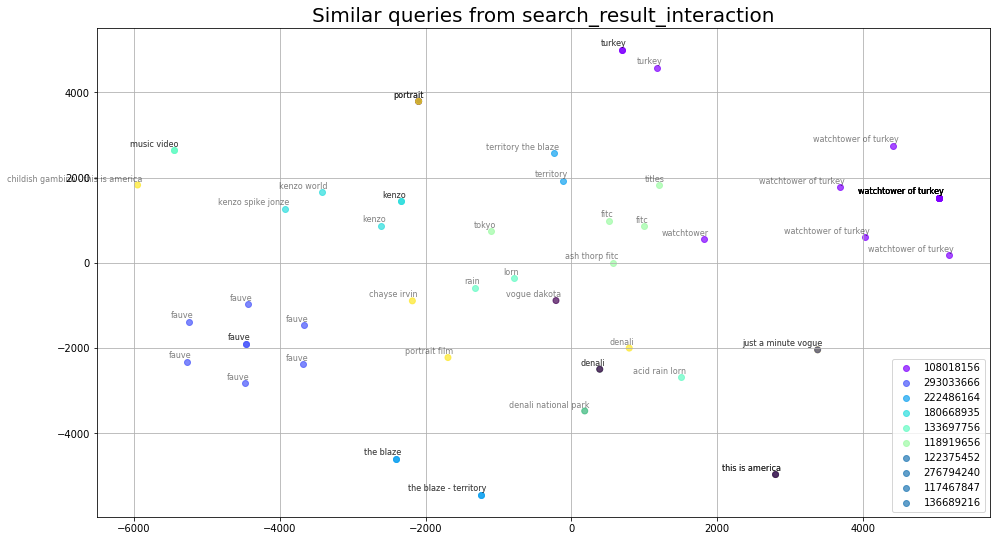

In [119]:
% matplotlib inline
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title, size=20)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar queries from search_result_interaction', keys, 
                        embedding_reshape, 
                        word_clusters, 0.7,
                        'similar_queries.png')

## The plot above shows that similar queries are clustered together in the latent space. For example, the cyan cluster in the top left corner clustered 'kenzo spike jonze' and 'kenzo world' close together since those are similar queries and resulted in the same video clip being clicked. This shows that queries that led to the same clicked video are similar as well. 